# S'entraîner

```{important}
Une partie des exercices suivants utilisent des données expérimentales stockées dans des fichiers. Chaque exercice vous donnera le lien permettant de télécharger le fichier. Vous avez normalement créé un répertoire pour votre travail sous Python. Dans ce répertoire (ou le sous-répertoire où vous comptez créer vos fichier `.py` pour les exercices, créez un répertoire `donnees_exp` dans lesquelles vous téléchargerez les fichiers fournis.

Vous devrez ensuite réfléchir au chemin relatif à utiliser dans vos scripts pour importer les données expérimentales de ces fichiers.
```

## Utilisation de numpy.random
```{admonition} Utilisation de numpy.random
:class: tip
La fonction `uniform(a, b, N)` de la bibliothèque `numpy.random` permet de réaliser N tirages aléatoires suivant une loi uniforme (toutes les valeurs ont la même probabilité) entre a et b. La fonction renvoie un vecteur numpy de taille N contenant les tirages.

Vous devez :
1. importer la sous-bibliothèque `numpy.random` dans l'espace nommé `rd` pour l'utiliser ensuite.
2. Utiliser la fonction `uniform` pour créer un vecteur contenant $N = 1000000$ de tirages aléatoires entre 0 et 5.
3. Obtenir alors le vecteur X contenant le carré de chaque valeur tirée précédemment.
4. Tracer l'histogramme des valeurs de X. Le titre sera "Distribution statistique", il n'est pas utile d'afficher la légende.

```

```{dropdown} Quelques indices pour s'organiser
* Vous avez besoin des deux bibliothèques scientifiques en plus de `numpy.random`. N'oubliez pas de les importer aussi.
* Bien comprendre le fonctionnement de `uniform` pour l'utiliser.
```

Vous devriez obtenir le graphique suivant (Cliquez sur la croix. Cela peut __un peu__ varier puisqu'on fait des tirages aléatoires) :

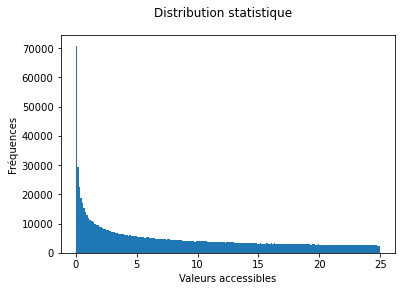

In [1]:
import matplotlib.pyplot  as plt
import numpy as np
import numpy.random as rd

N = 1000000

x = rd.uniform(0, 5, N)
y = x * x

f, ax = plt.subplots()
f.suptitle("Distribution statistique")

ax.set_xlabel("Valeurs accessibles")
ax.set_ylabel("Fréquences")

ax.hist(y, bins='rice')

plt.show()

## Etude de données expérimentales
````{admonition} Etude de données expérimentales
:class: tip
On étudie un circuit RC en régime libre. On a pris $R = 100k\Omega$ et on veut mesurer la capacité $C$ grâce aux données expérimentales. Les données sont fournies dans le fichier `circuit_rc_decharge.dat` accessible par [ce lien](https://github.com/pcsi3physiquestan/donnees_exp/blob/main/circuit_rc.dat?raw=true).

```{margin}
Si votre navigateur ouvre le fichier au lieu de le télécharger, faites un clic droit sur le lien et choisir `Enregistrer la cible du lien`)
```

Pour rappel, la tension $u_c$ aux bornes du condensateur est régit par l'équation différentielle :

$$
\frac{\rm{d}u_c}{\rm{dt}} + \frac{u_c}{RC} = 0
$$

Il a pour solution :

$$
u_c(t) = U_0 \exp(-\frac{t}{\tau})
$$

avec $\tau = RC$ et $U_0 = U(t=0)$

On sait que $u_c(t > \tau) < 0.37 U_0$.

```{margin}
Il est conseillé de vérifier votre travail au fur et à mesure avec par exemple des `print` réguliers.

```

1. Après avoir téléchargé le fichier de données et l'avoir déplacé dans le répertoire `donnees_exp`, l'ouvrir dans pyzo et observer son contenu. Quelles données expérimentales contient-il ?
2. Créer un fichier script Python (faire attention à sa localisation) et commencer par y importer les bibliothèques numpy et matplotlib.pyplot. Ecrire ensuite les instructions important la colonne temps et la colonne tension (en binaire) dans deux vecteurs `temps` et `ucb`.
3. La tension n'est pas données en volt mais en représentation binaire. En vous servant de la description données dans le fichier de données, écrire une fonction `bin_to_volt` qui prend comme argument une valeur `b` en binaire et qui renvoie la valeur de tension correspondant en Volt. Utilisez la pour obtenir un vecteur numpy `uc` à partir de `ucb`
4. Représenter, sur un graphique légendé et titré la courbe $u_c(t)$. L'allure est-elle conforme (visuellement) aux attentes théoriques ?
5. En utilisant les informations données dans l'énoncé, écrire une fonction `estime_tau` qui prend en argument deux vecteurs numpy `t` et `u` et qui estime le temps `tau`. On admettra que $u(t)$ est bien décroissante et on pourra prendre la première valeur de $u$ comme valeur de $U_0$. Utiliser cette fonction pour obtenir une estimation de $\tau$ puis de $C$.

```{dropdown} Valeur constructeur
La valeur annoncée par le constructeur est $C = 0.1 \mu F$ mais en l'absence d'étude plus complète sur les incertitudes de mesure, on ne peut décider si la valeur que vous avez estimée est cohérente. Vous trouverez ci-dessous les valeurs à trouver (cliquer sur la croix).
```
````

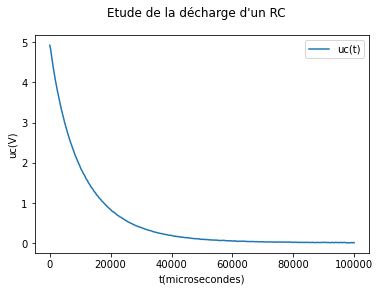

10700.0
11000.0
Valeur estimée de tau : 10850.0
Valeur estimée de C : 1.085e-07
Tous les chiffres ne sont pas forcément significatifs...


In [2]:
"""Les libraires ont déjà été importées à l'exercice précédent"""
temps, ucb = np.loadtxt('Sf6/circuit_rc.dat', skiprows=7, delimiter=";", unpack=True)  # Importation des données

def bin_to_volt(u):
	"""Fonction qui transforme une valeur 0-255 en valeur de tension."""
	B_MAX = 1023
	U_MAX = 5
	B_MIN = 0
	U_MIN = 0
	tension = (u - B_MIN) / (B_MAX - B_MIN) * (U_MAX - U_MIN) + U_MIN
	return tension

uc = bin_to_volt(ucb)


"""Tracé de uc(t)"""
f, ax = plt.subplots()
f.suptitle("Etude de la décharge d'un RC")
ax.set_xlabel('t(microsecondes)')
ax.set_ylabel('uc(V)')

ax.plot(temps, uc, label='uc(t)')

ax.legend()
plt.show()

"""Détermination de tau"""
U0 = uc[0]  # Tension initiale
i = 0
while uc[i] > 0.37 * U0 and i < len(uc):  # Test des 37%
    i = i + 1
print(temps[i])  # Temps juste avant d'invalider la condition
print(temps[i+1])  # Temps juste après invalidation

tau = (temps[i] + temps[i+1]) / 2  # On prend la moyenne des deux
R = 1e5  # Valeur de R
C = tau / R / 1e6  # (tau était en microsecondes)

print("Valeur estimée de tau :", tau)
print("Valeur estimée de C :", C)
print("Tous les chiffres ne sont pas forcément significatifs...")

## Expériences multiples
````{admonition} Expériences multiples
:class: tip
On reprend l'exemple précédent (même valeurs de R et C) mais cette fois le montage réalisé au moyen d'un microcontrolleur Arduino a permis d'automatiser la mesure de la constante $\tau$. On a ainsi réalisé $N$ décharges de C et le microcontrolleur a été programmé pour mesurer à chaque fois $\tau$ et le transmettre à l'ordinateur. Un programme non présenté ici a stocké les valeurs de $\tau$ dans un fichier accessible à [ce lien](https://github.com/pcsi3physiquestan/donnees_exp/blob/main/circuit_rc_auto.dat?raw=true).

```{margin}
Si votre navigateur ouvre le fichier au lieu de le télécharger, faites un clic droit sur le lien et choisir `Enregistrer la cible du lien`)
```

1. Après avoir téléchargé le fichier de données et l'avoir déplacé dans le répertoire `donnees_exp`, l'ouvrir dans pyzo et observer son contenu. Quelles données expérimentales contient-il ?
2. Créer un fichier script Python (faire attention à sa localisation) et commencer par y importer les bibliothèques numpy et matplotlib.pyplot. Ecrire ensuite les instructions important la colonne tau dans un vecteur `taus`. Afficher ensuite en une seule instruction le nombre N de décharges qui ont été réalisées.
3. Créer un graphique représentant l'histogramme des valeurs de $\tau$ mesurées. Observe-t-on des valeurs assurément problèmatiques ?
4. Utiliser les fonctions de numpy pour estimer la valeur moyennes des mesures de $\tau$ ainsi que l'écart-type des mesures. Utiliser la valeur moyenne de $\tau$ pour obtenir une estimation de la capacitance $C$.

````

Nombre de mesures : 1000


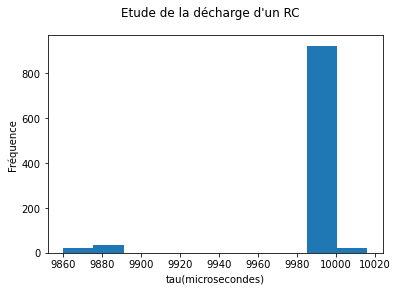

Tau moyen :  9985.208
Ecart-type :  27.001144379410995
Tous les chiffres ne sont pas forcément significatifs...
Valeur estimée de C : 1.085e-07


In [3]:
taus = np.loadtxt('Sf6/circuit_rc_auto.dat', skiprows=7, delimiter=",")  # Importation des données


print("Nombre de mesures :", len(taus))

f, ax = plt.subplots()
f.suptitle("Etude de la décharge d'un RC")
ax.set_xlabel('tau(microsecondes)')
ax.set_ylabel('Fréquence')

ax.hist(taus)

plt.show()

"""Calcul de la moyenne et écart-type"""
tau_m = np.mean(taus)
tau_u = np.std(taus, ddof=1)

print("Tau moyen : ", tau_m)
print("Ecart-type : ", tau_u)
print("Tous les chiffres ne sont pas forcément significatifs...")

R = 1e5  # Valeur de R
C = tau / R / 1e6  # (tau était en microsecondes)
print("Valeur estimée de C :", C)

## Célérité des ultrasons

Cet exercice est un plus complet. Veillez à bien comprendre ce qui a été fait précédemment.

````{admonition} Célérité des ultrasons
:class: tip
Le but est d'étudier la propagation des ultrasons dans l'air pour estimer leur célérité. Grâce à un microcontrolleur (Arduino), on a réalisé un grand nombre de mesures (environ 1000) du temps de vol $\Delta t$ des ultrasons pour plusieurs distances différentes $2D$ (on a réalisé un aller-retour par réflexion sur un obstacle) afin d'estimer pour chaque distance la célérité moyenne $c = {D \over \Delta t(D)}$. On fera alors la moyenne des célérités sur toutes les distances pour estimer la célérité des ultrasons dans l'air.

Le fichier de données est à télécharger à [ce lien](https://github.com/pcsi3physiquestan/donnees_exp/blob/main/vitesse_son_2.dat?raw=true).

```{margin}
Si votre navigateur ouvre le fichier au lieu de le télécharger, faites un clic droit sur le lien et choisir `Enregistrer la cible du lien`)
```

1. Après avoir téléchargé le fichier de données et l'avoir déplacé dans le répertoire `donnees_exp`, l'ouvrir dans pyzo et observer son contenu. Quelles données expérimentales contient-il ?
2. Vous avez dû remarquer que la forme du tableau de données n'est pas comme les précédents. Ecrire une série d'instructions qui charge les données expérimentales et stocke les distances $D$ dans un vecteur numpy `D` et le reste du tableau (sans la colonne des distances) dans un tableau numpy `temps_vol`. Vous trouverez plus d'informations sur la [manipulation des tableau numpy ici](tableau_numpy).
3. Créer un graphique et y tracer, pour chaque distance l'histogramme des valeurs mesurées. On prendra soin de bien légender chaque histogramme par sa distance. __Vous DEVEZ utiliser une boucle qui puisse s'adapter à un autre fichier de données qui aurait la même forme mais pas forcément les mêmes distances (ni le même nombre de distances étudiées).__
4. Observer les histogrammes, vous devriez observer que certaines mesures sont _clairement aberrantes_. Nous allons proposées une méthode de sélection des valeurs acceptables.

La méthode de sélection (non expliquée ici) consiste à calculer la moyenne $\Delta t_m (D)$ et l'écart-type $\sigma (D)$ des valeurs de temps de vol pour une distance $D$ puis parcourir l'ensemble des valeurs mesurées $\Delta t_i (D)$ pour la distance $D$.
* Si l'écart à la moyenne $\left\vert (\Delta t_i (D) - \Delta t_m (D) \right\vert$ est inférieure à 2 écart-type ($2 \sigma (D)$), alors on garde la valeur.
* Si l'écart à la moyenne $\left\vert (\Delta t_i (D) - \Delta t_m (D) \right\vert$ est supérieure à 2 écart-type ($2 \sigma (D)$), alors on enlève la valeur.

5. Ecrire une fonction qui prend comme argument un vecteur numpy `u` et qui renvoie un vecteur numpy `u_sel` ne contenant que les valeurs acceptables.
6. Pour chaque distance $D$ (toujours avec la contrainte de devoir s'adapter à un autre fichier de mesure), sélectionner les valeurs à garder puis calculer le temps de vol moyen puis la célérité du son associée $c(D)$. Stocker cette célérité dans un vecteur numpy `cs`.
7. Estimer la moyenne de `cs` comme une estimation de la célérité des ultrasons. Sachant qu'elle est à peu près identique à la célérité du son dans l'air, vérifier si l'ordre de grandeur obtenu est correct. Sans estimation des incertitudes de mesures, on se limitera à une vérification de l'ordre de grandeur.

````